In [9]:
import numpy as np
import pandas as pd
# import plotly.graph_objs as go
# import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

df = pd.read_csv('D:\Mini-project\Micro\BDA\Sleep_health_and_lifestyle_dataset.csv')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


> # EDA

In [10]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


* Person ID: An identifier for each individual in the dataset.
* Gender: The gender of the person (Male/Female).
* Age: The age of the person in years.
* Occupation: The occupation or profession of the person.
* Sleep Duration (hours): The number of hours the person sleeps per day.
* Quality of Sleep (scale: 1-10): A subjective rating of the quality of sleep, ranging from 1 to 10
* Physical Activity Level (minutes/day): The number of minutes the person engages in physical activity daily.
* Stress Level (scale: 1-10): A subjective rating of the stress level experienced by the person, ranging from 1 to 10.
* BMI Category: The BMI category of the person (e.g., Underweight, Normal, Overweight).
* Blood Pressure (systolic/diastolic): The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure.
* Heart Rate (bpm): The resting heart rate of the person in beats per minute.
* Daily Steps: The number of steps the person takes per day.
* Sleep Disorder: The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea).

In [12]:
df.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [13]:
print( df['Occupation'].value_counts() ); print( "\n\n")
print( df['Occupation'].value_counts() ); print( "\n\n")
print( df['Sleep Disorder'].value_counts() )

Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: count, dtype: int64



Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: count, dtype: int64



Sleep Disorder
Sleep Apnea    78
Insomnia       77
Name: count, dtype: int64


In [14]:
# def plotly_boxplot(df , numeric_types , color  , row = None) :
#     def gather( df, key, value, cols ):
#         id_vars = [ col for col in df.columns if col not in cols ]
#         id_values = cols
#         var_name = key
#         value_name = value
#         return pd.melt( df, id_vars, id_values, var_name, value_name )
#     numeric_gather = gather( df , 'key', 'value', numeric_types )
#     fig = px.box(numeric_gather, x="key", y="value",
#                  facet_col="key" ,color = color , 
#                  facet_row=row )
#     fig.update_yaxes(showticklabels=True , matches=None)
#     fig.update_xaxes(showticklabels=True , matches=None)
#     fig.show()

In [15]:
# plotly_boxplot(df, ["Stress Level", "Sleep Duration"], "Occupation")

In [16]:
# plotly_boxplot(df, ["Stress Level", "Sleep Duration"], "BMI Category")

In [17]:
# plotly_boxplot(df, ["Quality of Sleep"], "BMI Category")

In [18]:
# def plotly_scatter(df , numerical_column_one, numerical_column_two ,
#                    color = None  , row = None , col =None) :
#     fig = px.scatter(df, 
#                      x=numerical_column_one,
#                      y=numerical_column_two,
#                      facet_col=col,
#                      color = color , 
#                      facet_row=row , height = 600)
#     fig.update_yaxes(showticklabels=True , matches=None ,)
#     fig.update_xaxes(showticklabels=True , matches=None)
#     fig.show()

In [19]:
# plotly_scatter(df, "Age", "Sleep Duration",color="BMI Category")

In [20]:
# color_palette = {'Male': 'lightblue', 'Female': 'lightcoral'}
# plt.figure(figsize=(10, 6))
# sns.violinplot(x='Gender', y='Quality of Sleep', data=df, palette=color_palette)
# plt.title('Distribution of Quality of Sleep by Gender', fontsize=16)
# plt.xlabel('Gender', fontsize=12)
# plt.ylabel('Quality of Sleep', fontsize=12)
# plt.show()

In [21]:
# fig = px.bar(df, 
#              x='Stress Level', 
#              y='Quality of Sleep',
#              title='Relationship between Stress Level and Quality of Sleep',
#              width = 900, height = 600
#             )
# fig.show()

In [22]:
# plotly_boxplot(df, ["Stress Level", "Sleep Duration"], "Quality of Sleep")

> # Data Preprocessing

In [23]:
df = pd.concat([df, df['Blood Pressure'].str.split('/', expand=True)], axis=1).drop('Blood Pressure', axis=1)
df = df.rename(columns={0: 'BloodPressure_Upper', 1: 'BloodPressure_Lower'})
df['BloodPressure_Upper'] = df['BloodPressure_Upper'].astype(float)
df['BloodPressure_Lower'] = df['BloodPressure_Lower'].astype(float)

In [24]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Occupation'] = label_encoder.fit_transform(df['Occupation'])
df['BMI Category'] = label_encoder.fit_transform(df['BMI Category'])
df['Sleep Disorder'] = label_encoder.fit_transform(df['Sleep Disorder'])
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,BloodPressure_Upper,BloodPressure_Lower
0,1,1,27,9,6.1,6,42,6,3,77,4200,2,126.0,83.0
1,2,1,28,1,6.2,6,60,8,0,75,10000,2,125.0,80.0
2,3,1,28,1,6.2,6,60,8,0,75,10000,2,125.0,80.0
3,4,1,28,6,5.9,4,30,8,2,85,3000,1,140.0,90.0
4,5,1,28,6,5.9,4,30,8,2,85,3000,1,140.0,90.0


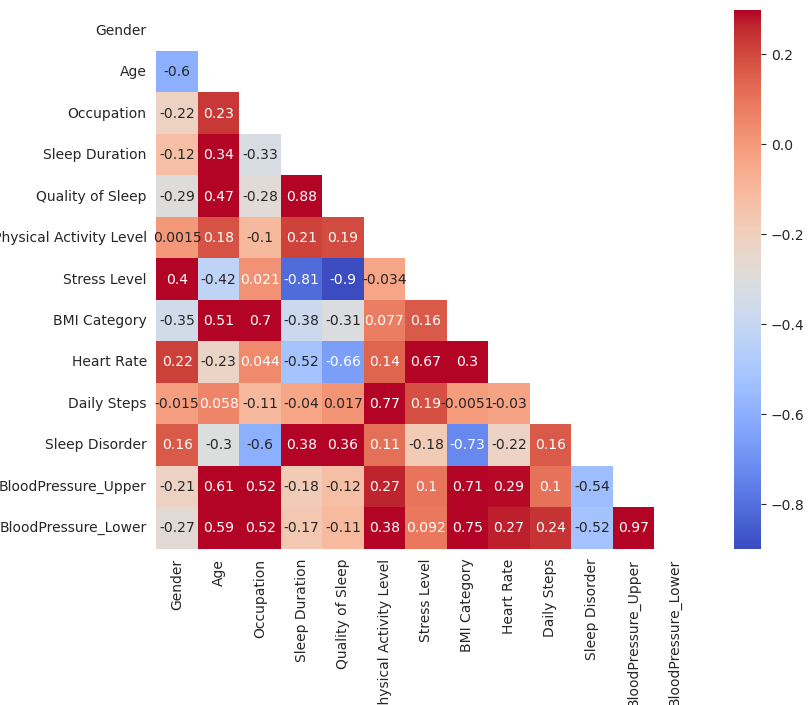

In [25]:
def corr_vis(corr) :
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    with sns.axes_style("white"):
        f, ax = plt.subplots(figsize=(10, 7))
        g = sns.heatmap(corr, mask=mask, vmax=.3, square=True, annot=True, cmap='coolwarm')
        g.set_xticklabels(g.get_xticklabels(), rotation = 90, fontsize = 10)

num_corr = df.drop('Person ID', axis=1).corr()
corr_vis(df.drop('Person ID', axis=1).corr())

In [26]:
# plotly_boxplot(df, ["BloodPressure_Upper", "BloodPressure_Lower"], "Quality of Sleep")

# Version1. Simple Logistic Regression
* Accuracy : 91%
* Without EDA
* Without Scaler

> # Step1. Data Check

In [27]:
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,BloodPressure_Upper,BloodPressure_Lower
0,1,1,27,9,6.1,6,42,6,3,77,4200,2,126.0,83.0
1,2,1,28,1,6.2,6,60,8,0,75,10000,2,125.0,80.0
2,3,1,28,1,6.2,6,60,8,0,75,10000,2,125.0,80.0
3,4,1,28,6,5.9,4,30,8,2,85,3000,1,140.0,90.0
4,5,1,28,6,5.9,4,30,8,2,85,3000,1,140.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,0,59,5,8.1,9,75,3,3,68,7000,1,140.0,95.0
370,371,0,59,5,8.0,9,75,3,3,68,7000,1,140.0,95.0
371,372,0,59,5,8.1,9,75,3,3,68,7000,1,140.0,95.0
372,373,0,59,5,8.1,9,75,3,3,68,7000,1,140.0,95.0


> # Step2. Model Training

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc

# Prepare the data
X = df.drop(['Person ID', 'Sleep Disorder'], axis=1)
y = df['Sleep Disorder']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [46]:
print(X_train, y_train)

     Gender  Age  Occupation  Sleep Duration  Quality of Sleep  \
225       1   44           7             6.3                 6   
100       0   36          10             7.2                 8   
270       0   49           5             6.1                 6   
108       1   37           2             7.8                 8   
324       0   53           2             8.3                 9   
..      ...  ...         ...             ...               ...   
299       0   51           2             8.5                 9   
22        1   30           1             7.7                 7   
72        1   33           1             6.1                 6   
15        1   29           1             6.0                 6   
168       1   41           3             7.1                 7   

     Physical Activity Level  Stress Level  BMI Category  Heart Rate  \
225                       45             7             3          72   
100                       60             4             0       

In [29]:
# Create the models
lr_d = LogisticRegression()

# Fit the models
lr_d.fit(X_train, y_train)

LogisticRegression()

> # Step3. Prediction and Report

In [ ]:
# from sklearn.metrics import accuracy_score
# #import plotly.express as px
# colors = px.colors.sequential.Plasma_r

# def plot_classification_report(report, title):
#     lines = report.split('\n')[2:-5]
#     classes = []
#     precision = []
#     recall = []
#     f1_score = []
#     support = []
#     for line in lines:
#         row_data = line.split()
#         classes.append(row_data[0])
#         precision.append(float(row_data[1]))
#         recall.append(float(row_data[2]))
#         f1_score.append(float(row_data[3]))
#         support.append(int(row_data[4]))

NameError: name 'px' is not defined

In [32]:
lr_pred_d = lr_d.predict(X_test)

In [35]:
# Classification reports for different algorithms
lr_d_report = classification_report(y_test, lr_pred_d)

# Plot classification reports
print("[ Logistic Regression report ]\n")
print(lr_d_report)
#plot_classification_report(lr_d_report, "Logistic Regression Classification Report Visualization")

[ Logistic Regression report ]

              precision    recall  f1-score   support

           0       0.93      0.87      0.90        15
           1       0.88      0.83      0.86        18
           2       0.91      0.95      0.93        42

    accuracy                           0.91        75
   macro avg       0.91      0.88      0.89        75
weighted avg       0.91      0.91      0.91        75



# Version2. ML Comparison
* Comp. Models : Logistic Regression, Random Forest, Gradient Boosting
* Gradient Boosting Accuracy : 95%
* Without EDA
* Scaler : Standard Scaler

In [38]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

scaler_d = StandardScaler()
X_train_scaled = scaler_d.fit_transform(X_train)
X_test_scaled = scaler_d.transform(X_test)


# Create the models
lr_d = LogisticRegression()
rf_d = RandomForestClassifier()
gb_d = GradientBoostingClassifier()

# Fit the models
lr_d.fit(X_train_scaled, y_train)
rf_d.fit(X_train_scaled, y_train)
gb_d.fit(X_train_scaled, y_train)

lr_pred_d = lr_d.predict(X_test_scaled)
rf_pred_d = rf_d.predict(X_test_scaled)
gb_pred_d = gb_d.predict(X_test_scaled)

In [39]:
lr_d_report = classification_report(y_test, lr_pred_d)

# Plot classification reports
print("[ Logistic Regression report ]\n")
print(lr_d_report)
#plot_classification_report(lr_d_report, "Logistic Regression Classification Report")

[ Logistic Regression report ]

              precision    recall  f1-score   support

           0       0.93      0.87      0.90        15
           1       0.88      0.83      0.86        18
           2       0.91      0.95      0.93        42

    accuracy                           0.91        75
   macro avg       0.91      0.88      0.89        75
weighted avg       0.91      0.91      0.91        75



In [40]:
rf_d_report = classification_report(y_test, rf_pred_d)

# Plot classification reports
print("[ Random forest report ]\n")
print(rf_d_report)
#plot_classification_report(rf_d_report, "Random Forest Classification Report")

[ Random forest report ]

              precision    recall  f1-score   support

           0       0.93      0.87      0.90        15
           1       1.00      0.89      0.94        18
           2       0.93      1.00      0.97        42

    accuracy                           0.95        75
   macro avg       0.95      0.92      0.93        75
weighted avg       0.95      0.95      0.95        75



In [41]:
gb_d_report = classification_report(y_test, gb_pred_d)

# Plot classification reports
print("[ Gradient Boosting report ]\n")
print(gb_d_report)
#plot_classification_report(rf_d_report, "Gradient Boosting Classification Report")

[ Gradient Boosting report ]

              precision    recall  f1-score   support

           0       0.93      0.87      0.90        15
           1       1.00      0.89      0.94        18
           2       0.93      1.00      0.97        42

    accuracy                           0.95        75
   macro avg       0.95      0.92      0.93        75
weighted avg       0.95      0.95      0.95        75



In [43]:
lr_accuracy = accuracy_score(y_test, lr_pred_d)
rf_accuracy = accuracy_score(y_test, rf_pred_d)
gb_accuracy = accuracy_score(y_test, gb_pred_d)

accuracy_scores = [lr_accuracy,rf_accuracy,gb_accuracy] 
print(accuracy_scores)
    
# fig = go.Figure(data=go.Bar(x=['Logistic Regression','Random Forest','Gradient Boosting'], y=accuracy_scores, width=[0.2, 0.2, 0.2]) ) 
# fig.update_layout(title='Comparison of Models',
#                   xaxis=dict(title='Models'),
#                   yaxis=dict(title='Accuracy Score'))
# fig.show()

[0.9066666666666666, 0.9466666666666667, 0.9466666666666667]


In [48]:
import joblib
joblib.dump(rf_d, 'model.pkl')

['model.pkl']

In [51]:
model = joblib.load('model.pkl')

In [52]:
import numpy as np

# Example values for each feature
gender = 1                      # 1 for male, 0 for female
age = 30                        # Age in years
occupation = 1                  # Encoded occupation type (e.g., 1 for office worker)
sleep_duration = 7.5            # Hours of sleep per day
quality_of_sleep = 4            # Sleep quality on a scale of 1-5
physical_activity_level = 2     # 2 for active
stress_level = 5                # Stress level on a scale of 1-10
bmi_category = 1                # BMI category (1 for normal)
heart_rate = 72                 # Heart rate in bpm
daily_steps = 10000             # Number of steps per day
blood_pressure_upper = 120      # Systolic blood pressure
blood_pressure_lower = 80       # Diastolic blood pressure

# Create the input features array
input_features = np.array([[gender, age, occupation, sleep_duration, quality_of_sleep,
                            physical_activity_level, stress_level, bmi_category,
                            heart_rate, daily_steps, blood_pressure_upper, blood_pressure_lower]])

# Predict using the loaded model
prediction = model.predict(input_features)

print("Prediction:", prediction)


Prediction: [1]
